In [1]:
import sklearn
#import dicom
import os
import numpy as np
import pylab  
import nibabel as nib
import cv2
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import random
from time import time
%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


In [2]:
def npmin(dd):
    return np.min(dd)
def npmax(dd):
    return np.max(dd)
def npmean(dd):
    return np.mean(dd)
def norm (data, minimum, maximum):
    return (data - minimum) / (maximum - minimum)*1
def gen_batch(data,batch_size,train_size):
    z_batch=[]
    for j in range(batch_size):
        index = np.random.randint(0, data.shape[0]-batch_size, size=1)[0]
        z_batch.append(data[index, :train_size, :train_size])
    z_batch = np.array(z_batch)
    z_batch=z_batch.reshape(batch_size, train_size, train_size, 1)
    return z_batch

In [3]:

ROI_xs = [[200, 200], [250, 275], [290, 70], [310, 90]]
ROI_ys = [[140, 300], [50, 335], [200, 350], [250,460]]
ROI_ss = [15, 15, 15, 15]

ROIs = 32

In [4]:

case = 0

path = []
filepath_0 = "../../../CT_data_nii/routine_dose/CAO_ZHAN_YUAN_10686240_19609_10571_SY_Cardiac_step_infant_Cardiac_45_0%.nii"
filepath_1 = "../../../CT_data_nii/low_dose/HE_FU_QUAN_10687472_19877_004_SY_Cardiac_step_infant_Cardiac_45_0%.nii"
filepath_2 = "../../../CT_data_nii/low_dose/XU_YU_LIANG_10686626_19690_004_SY_Cardiac_Step&Shoot_Cardiac_45_0%.nii"
filepath_3 = "../../../CT_data_nii/special_artifact/mental_artifact1.npy"
path = [filepath_0, filepath_1, filepath_2, filepath_3]

tts = [220, 200, 403, 0]

filepath = path[case]
tt = tts[case]
ROI_x = ROI_xs[case]
ROI_y = ROI_ys[case]
ROI_s = ROI_ss[case]


In [5]:
if(case==3):
    img = np.load(filepath)
    img_array = np.reshape(img, (1, img.shape[0], img.shape[1]))
else:
    img = nib.load(filepath)
    img_array = img.get_data()
    print(img_array.shape)
    img_array = img_array.transpose(0, 2, 1)
    img_array = img_array.transpose(1, 0, 2)
    
label = img_array
label = np.asarray(label)
print(label.shape)
label_min = npmin(label)
label_max = npmax(label)
print(label_min, label_max)

label = norm(label,np.min(label),np.max(label))
print(npmean(label))

(512, 512, 245)
(245, 512, 512)
-1024.0 2156.0
0.1348549439649708


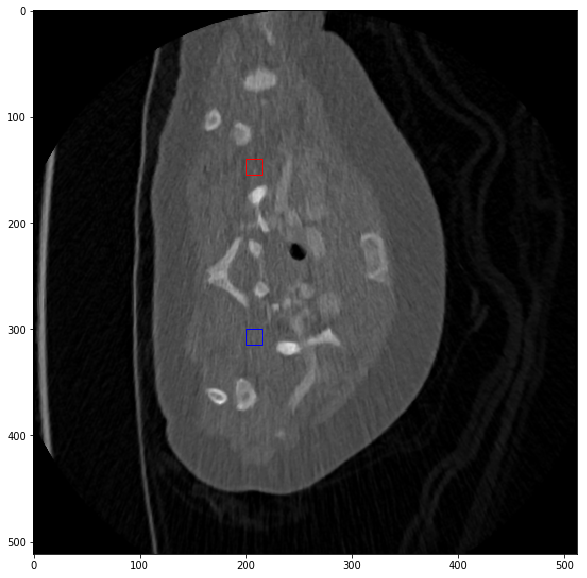

(512, 512)


In [6]:

fig = plt.figure(figsize=(20, 10))
rect = patches.Rectangle((ROI_x[0],ROI_y[0]),ROI_s,ROI_s,linewidth=1,edgecolor='r',facecolor='none')
plt.gca().add_patch(rect)

rect = patches.Rectangle((ROI_x[1],ROI_y[1]),ROI_s,ROI_s,linewidth=1,edgecolor='b',facecolor='none')
plt.gca().add_patch(rect)

plt.imshow(label[tt],cmap=pylab.cm.gray,vmin = 0,vmax = 1)
plt.show()

CT_label = label[tt]
print(CT_label.shape)

In [7]:
stride = 16
patch = []
if (case==3):
    image = label[0,:,:]
else:
    image = label[200,:,:]
print(image.shape)
for i in range((int)(image.shape[0]/stride)):
    for j in range((int)(image.shape[1]/stride)):
        if i*stride + ROIs <= image.shape[0] and j*stride + ROIs <= image.shape[1]:
            patch.append(image[i*stride:i*stride+ROIs, j*stride:j*stride+ROIs])
patch = np.asarray(patch)
print(patch.shape)

(512, 512)
(961, 32, 32)


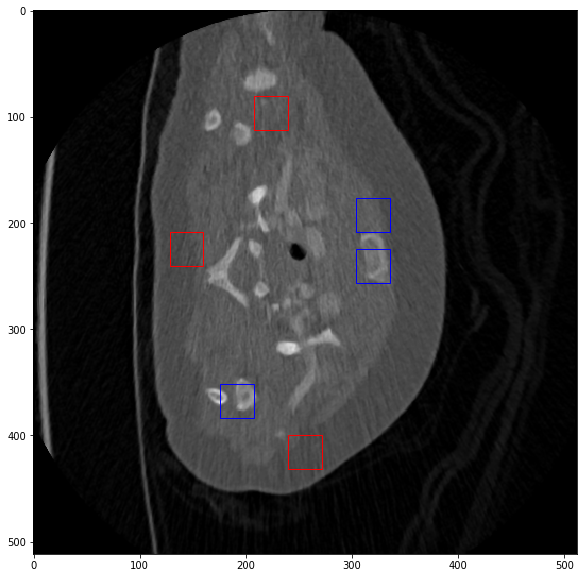

In [8]:
fig = plt.figure(figsize=(20, 10))

if(case==0):
    rect = patches.Rectangle((16*13,16*5),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*8,16*13),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*15,16*25),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*19,16*14),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*11,16*22),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*19,16*11),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
elif(case==1):
    rect = patches.Rectangle((16*14,16*5),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*18,16*8),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*12,16*13),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*20,16*11),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*19,16*18),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*9,16*22),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
elif(case==2):
    rect = patches.Rectangle((16*17,16*9),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*3,16*9),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*4,16*21),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*15,16*25),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*13,16*28),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*10,16*3),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
else:
    rect = patches.Rectangle((16*21,16*14),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*19,16*15),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*15,16*8),ROIs,ROIs,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*18,16*29),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*11,16*27),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)
    rect = patches.Rectangle((16*22,16*11),ROIs,ROIs,linewidth=1,edgecolor='b',facecolor='none')
    plt.gca().add_patch(rect)

plt.imshow(label[tt],cmap=pylab.cm.gray,vmin = 0,vmax = 1)
plt.show()

In [9]:
def newEntry(image, label):
    entry = []
    entry.append(image)
    entry.append(np.asarray(label))
    return entry

train_data = []
if(case==0):
    train_data.append(newEntry(patch[0], [0,0,1]))
    train_data.append(newEntry(patch[168], [0,1,0])) #155+13 noise
    train_data.append(newEntry(patch[411], [0,1,0])) #403+8
    train_data.append(newEntry(patch[790], [0,1,0])) #775+15
    train_data.append(newEntry(patch[453], [1,0,0])) #434+19 other
    train_data.append(newEntry(patch[693], [1,0,0])) #682+11
    train_data.append(newEntry(patch[360], [1,0,0])) #341+19
elif(case==1):
    train_data.append(newEntry(patch[0], [0,0,1]))
    train_data.append(newEntry(patch[169], [0,1,0])) #155+14 noise
    train_data.append(newEntry(patch[266], [0,1,0])) #248+18
    train_data.append(newEntry(patch[415], [0,1,0])) #403+12
    train_data.append(newEntry(patch[361], [1,0,0])) #341+20 other
    train_data.append(newEntry(patch[577], [1,0,0])) #558+19
    train_data.append(newEntry(patch[691], [1,0,0])) #682+9
elif(case==2):
    train_data.append(newEntry(patch[0], [0,0,1]))
    train_data.append(newEntry(patch[296], [0,1,0])) #279+17 noise
    train_data.append(newEntry(patch[282], [0,1,0])) #279+3
    train_data.append(newEntry(patch[655], [0,1,0])) #651+4
    train_data.append(newEntry(patch[790], [1,0,0])) #775+15 other
    train_data.append(newEntry(patch[881], [1,0,0])) #868+13
    train_data.append(newEntry(patch[103], [1,0,0])) #93+10
else:
    train_data.append(newEntry(patch[0], [0,0,1]))
    train_data.append(newEntry(patch[455], [0,1,0])) #434+21 noise
    train_data.append(newEntry(patch[484], [0,1,0])) #465+19
    train_data.append(newEntry(patch[263], [0,1,0])) #248+15
    train_data.append(newEntry(patch[917], [1,0,0])) #899+18 other
    train_data.append(newEntry(patch[848], [1,0,0])) #837+11
    train_data.append(newEntry(patch[363], [1,0,0])) #341+22

train_data = np.asarray(train_data)
print(train_data.shape)

(7, 2)


In [10]:
old_test_data = []
patch_test_size = 40
test_stride = 5
if(case==3):
    patch_test = 0
else:
    patch_test = [190]
    for k in patch_test:
        image = label[k,:,:]
        print(image.shape)
        for i in range((int)(image.shape[0]/test_stride)):
            for j in range((int)(image.shape[1]/test_stride)):
                if(i*test_stride + patch_test_size <= image.shape[0] and j*test_stride + patch_test_size <= image.shape[1]):
                    old_test_data.append(image[i*test_stride:i*test_stride+patch_test_size, j*test_stride:j*test_stride+patch_test_size])
                    #95 * 95
test_data = np.asarray(old_test_data)
print(test_data.shape)

(512, 512)
(9025, 40, 40)


In [11]:
def augmentation(data):
    data_rotate = []
    data_flip = []
    for i in data:
        data_rotate.append(newEntry(np.rot90(i[0],0),i[1]))
        data_rotate.append(newEntry(np.rot90(i[0],1),i[1]))
        data_rotate.append(newEntry(np.rot90(i[0],2),i[1]))
        data_rotate.append(newEntry(np.rot90(i[0],3),i[1]))
    for i in data_rotate:
        data_flip.append(i)
        data_flip.append(newEntry(np.fliplr(i[0]),i[1]))
    return np.asarray(data_flip)

train_data = augmentation(train_data)
np.random.shuffle(train_data)
print(train_data.shape)
print(test_data.shape)

(56, 2)
(9025, 40, 40)


In [12]:
img_size = 40
epochs = 200
step_size = 32
cvstep_size = 2

for i in range(len(train_data)):
    train_data[i][0] = cv2.resize(train_data[i][0], (img_size, img_size))

train_num = train_data.shape[0]
train_valid_rate = 0.8
train = train_data[:(int)(train_valid_rate*train_num)]
cv = train_data[(int)(train_valid_rate*train_num):]

x = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 1)
y = np.array([i[1] for i in train])

cv_x = np.array([i[0] for i in cv]).reshape(-1, img_size, img_size, 1)
cv_y = np.array([i[1] for i in cv])

test_data_x = np.array([i for i in test_data]).reshape(-1, img_size, img_size, 1)

print(x.shape)
print(y.shape)
print(cv_x.shape)
print(cv_y.shape)
print(test_data_x.shape)

steps = len(train)
print(steps)
remain = steps % step_size
cvsteps = len(cv)
print(cvsteps)
cv_remain = cvsteps % cvstep_size

(44, 40, 40, 1)
(44, 3)
(12, 40, 40, 1)
(12, 3)
(9025, 40, 40, 1)
44
12


In [13]:
gpu_options = tf.GPUOptions(allow_growth=True)

tf.reset_default_graph()
x_conv = tf.placeholder(tf.float32,shape=[None,40,40,1])
y_true = tf.placeholder(tf.float32,shape=[None,3])
hold_prob1 = tf.placeholder(tf.float32)
hold_prob2 = tf.placeholder(tf.float32)

def CNN_Classified(conv):
    conv = tf.layers.conv2d(conv, 32, 3, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_1')
    conv = tf.nn.relu(conv)
    conv = tf.layers.conv2d(conv, 32, 3, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_2')
    conv = tf.nn.relu(conv)
    conv = tf.layers.conv2d(conv, 32, 3, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_3')
    conv = tf.nn.relu(conv)
    conv = tf.contrib.layers.flatten(conv)
    conv = tf.layers.dense(conv, units=1024, name='c_4')
    conv = tf.nn.dropout(conv, keep_prob=hold_prob1)
    conv = tf.layers.dense(conv, units=3, name='c_5')
    return conv


y_pred = CNN_Classified(x_conv)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred,labels=y_true))
train = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cross_entropy)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
init = tf.global_variables_initializer()

acc_list = []
auc_list = []
loss_list = []
istrain = True

saver = tf.train.Saver()
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
print(datetime.datetime.now())
if istrain == True:

    sess.run(init)
    for i in range(epochs):
        for j in range(0, steps-remain):
            _,opt = sess.run([train, cross_entropy], feed_dict={x_conv:x[j:j+step_size], y_true:y[j:j+step_size], hold_prob1:0.5, hold_prob2:0.5})

        cv_acc_list = []
        cv_loss_list = []
        for k in range(0, cvsteps-cv_remain, cvstep_size):
            true, loss_cv, preds = sess.run([tf.nn.softmax(y_true), cross_entropy, tf.nn.softmax(y_pred)],
                                         feed_dict={x_conv:cv_x[k:k+cvstep_size], y_true:cv_y[k:k+cvstep_size], hold_prob1:1.0, hold_prob2:1.0})

            for l in range(preds.shape[0]):
                r = np.round(preds[l], 3).argmax()
                #print("l",l, "r",r, "true",true[l])
                #print(preds[l,r])
                if preds[l,r] >= 0:
                    if r == np.argmax(true[l]):
                        cv_acc_list.append(1)
                        cv_loss_list.append(loss_cv)
                    else:
                        cv_acc_list.append(0)

        acc_cv = round(np.mean(cv_acc_list), 4)
        loss_cv = round(np.mean(cv_loss_list), 4)
        acc_list.append(acc_cv)
        loss_list.append(loss_cv)
        print("Epoch:", i, "Accuracy:", acc_cv, "Loss:", loss_cv)
    saver.save(sess, os.path.join(os.getcwd(),"CNN.ckpt"))

2019-10-06 20:14:27.498222
Epoch: 0 Accuracy: 0.5833 Loss: 0.454
Epoch: 1 Accuracy: 0.4167 Loss: 0.5319
Epoch: 2 Accuracy: 0.6667 Loss: 0.6134
Epoch: 3 Accuracy: 0.6667 Loss: 0.5913
Epoch: 4 Accuracy: 0.8333 Loss: 0.5831
Epoch: 5 Accuracy: 0.8333 Loss: 0.5703
Epoch: 6 Accuracy: 0.8333 Loss: 0.5416
Epoch: 7 Accuracy: 0.8333 Loss: 0.5225
Epoch: 8 Accuracy: 0.8333 Loss: 0.4959
Epoch: 9 Accuracy: 0.8333 Loss: 0.4776
Epoch: 10 Accuracy: 0.8333 Loss: 0.4577
Epoch: 11 Accuracy: 0.8333 Loss: 0.4341
Epoch: 12 Accuracy: 0.8333 Loss: 0.4228
Epoch: 13 Accuracy: 0.8333 Loss: 0.4216
Epoch: 14 Accuracy: 0.8333 Loss: 0.3891
Epoch: 15 Accuracy: 0.8333 Loss: 0.3871
Epoch: 16 Accuracy: 0.8333 Loss: 0.3752
Epoch: 17 Accuracy: 0.8333 Loss: 0.3601
Epoch: 18 Accuracy: 0.8333 Loss: 0.3655
Epoch: 19 Accuracy: 0.8333 Loss: 0.3975
Epoch: 20 Accuracy: 0.8333 Loss: 0.3603
Epoch: 21 Accuracy: 0.8333 Loss: 0.3692
Epoch: 22 Accuracy: 0.8333 Loss: 0.3672
Epoch: 23 Accuracy: 0.8333 Loss: 0.3663
Epoch: 24 Accuracy: 0.83

In [15]:
acc_list = np.asarray(acc_list)
loss_list = np.asarray(loss_list)
print(acc_list.shape)
print(loss_list.shape)

(200,)
(200,)


In [16]:
print(test_data_x.shape)
test_num = test_data_x.shape[0]

#with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
saver.restore(sess, "CNN.ckpt")
out_label = sess.run([tf.nn.softmax(y_pred)], feed_dict={x_conv:test_data_x[0:test_num], hold_prob1:1.0, hold_prob2:1.0})

print(np.asarray(out_label).shape)

out_label = np.array(out_label).reshape(test_num, 3)
pred_labels = []
output_images = []

for i in range(test_num):
    r = np.round(out_label[i], 3).argmax()
    if out_label[i, r] >= 0:
        output_images.append(test_data_x[i])
        if r == 1:
            pred_labels.append("noise")
        else:
            pred_labels.append("other")


images = np.asarray(output_images)
print(images.shape)

    

(9025, 40, 40, 1)
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from CNN.ckpt
(1, 9025, 3)
(9025, 40, 40, 1)


In [73]:
other = []
for i in range(len(images)):
    if pred_labels[i] == "other":
        other.append(i)
        img_other = images[i].reshape([40, 40])
        img_other = cv2.resize(img_other, (patch_test_size, patch_test_size))

noise = []
for j in range(len(images)):
    if pred_labels[j] == "noise":
        noise.append(j)
        img_noise = images[j].reshape([40, 40])
        img_noise = cv2.resize(img_noise, (patch_test_size, patch_test_size))

print(len(other))
print(len(noise))

7594
1431


In [74]:
other_image = []
for i in range(len(other)):
    img_other = images[other[i]].reshape([40, 40])
    img_other = cv2.resize(img_other, (patch_test_size, patch_test_size))
    other_image.append(img_other)

noise_image = []
for j in range(len(noise)):
    img_noise = images[noise[j]].reshape([40, 40])
    img_noise = cv2.resize(img_noise, (patch_test_size, patch_test_size))
    noise_image.append(img_noise)
    
other_image = np.asarray(other_image)
noise_image = np.asarray(noise_image)

print(other_image.shape)
print(noise_image.shape)

print("mean:", npmean(other_image))
other_m = []
for img in other_image:
    mean = npmean(img)
    img -= mean
    other_m.append(img)
other_m = np.asarray(other_m)
print("vmin:", npmin(other_m))
print("vmax:", npmax(other_m))

(7594, 40, 40)
(1431, 40, 40)
mean: 0.11234545142184381
vmin: -0.42368160377358494
vmax: 0.7887315251572327


mean: 0.3304226903493621
(6, 40, 40)


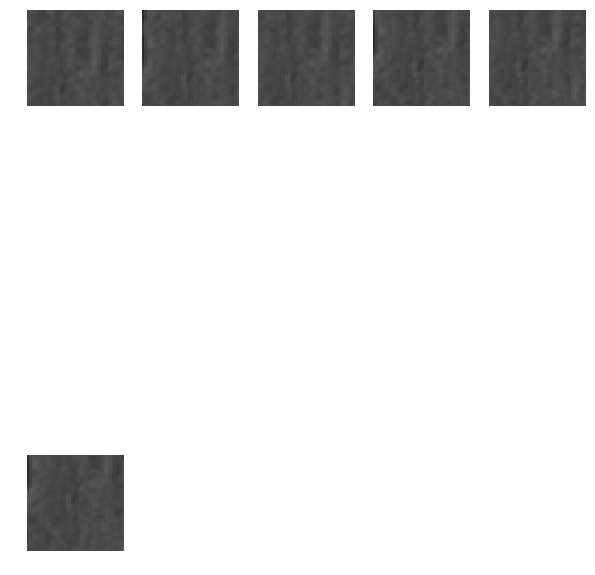

vmin: -0.13798997641509433
vmax: 0.06484021226415093
(6, 40, 40)


In [75]:
new_noise_image = []
#noisemean = npmean(noise_image)
print("mean:", npmean(noise_image))
for img in noise_image:
    if not (npmin(img) < 0.05 or npmax(img) > 0.35):
        #mean = npmean(img)
        #img -= mean
        new_noise_image.append(img)

noise_image = np.asarray(new_noise_image)
print(noise_image.shape)

wid = 5
hei = noise_image.shape[0] / wid + 1
fig = plt.figure(figsize=(10, 15))
i = 0
for img in noise_image:
    i = i + 1
    plt.subplot(hei,wid,i)
    plt.axis('off')
    plt.imshow(img, cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.show()

minusmean_noise = []
for img in noise_image:
    mean = npmean(img)
    img -= mean
    minusmean_noise.append(img)
noise_image = np.asarray(minusmean_noise)
vmin = npmin(noise_image)
vmax = npmax(noise_image)
print("vmin:", vmin)
print("vmax:", vmax)
print(noise_image.shape)


In [76]:
noise_32 = []
for img in noise_image:
    img_noise = img.reshape([40, 40])
    img_noise = cv2.resize(img_noise, (32, 32), interpolation=cv2.INTER_CUBIC)
    noise_32.append(img_noise)
    
noise_32 = np.asarray(noise_32)
print(noise_32.shape)

(6, 32, 32)


In [77]:
zero = []
if (case==3):
    for img in range(300):
        zero.append(images[0])
else:
    for img in images:
        if (npmin(img) == 0 and npmax(img) == 0):
            zero.append(img)
            img_copy = img.copy()
            #img_copy2 = img.copy()
            #zero.append(img_copy)
            zero.append(img_copy)
            
zero = np.asarray(zero)
print(zero.shape)

zero_32 = []
for img in zero:
    img_zero = img.reshape([40, 40])
    img_zero = cv2.resize(img_zero, (32, 32), interpolation=cv2.INTER_CUBIC)
    zero_32.append(img_zero)
zero_32 = np.asarray(zero_32)
print(zero_32.shape)

spare = (noise_32.shape[0]+zero_32.shape[0])%256
zero_spare = []
num = 0
for img in zero_32:
    num = num + 1
    if(num <= zero_32.shape[0]-spare+17):
        zero_spare.append(img)
zero_spare = np.asarray(zero_spare)
print(zero_spare.shape)

(360, 40, 40, 1)
(360, 32, 32)
(267, 32, 32)


In [78]:
noise_pattern = []
for img in noise_32:
    noise_pattern.append(img)
for img in zero_spare:
    noise_pattern.append(img)
noise_pattern = np.asarray(noise_pattern)
np.random.shuffle(noise_pattern)
print(noise_pattern.shape)

(273, 32, 32)


In [79]:
width = int(512/32)
height = int(512/32)

def mergeImage(data):
    raw = []
    for i in range(len(data)):
        if i % width == 0:
            if i / width != 0:
                raw.append(i_raw)
            i_raw = data[i]
        else:
            i_raw = np.concatenate((i_raw, data[i]), axis=1)
    raw = np.asarray(raw)
    print(raw.shape)
    
    data_all = []
    for j in range(len(raw)):
        if j % height == 0:
            if j / height != 0:
                data_all.append(gen_image)
            gen_image = raw[j]
        else:
            gen_image = np.concatenate((gen_image, raw[j]), axis=0)
            
    data_all = np.asarray(data_all)
    print(data_all.shape)
    return data_all

noise_all = mergeImage(noise_pattern)

(17, 32, 512)
(1, 512, 512)


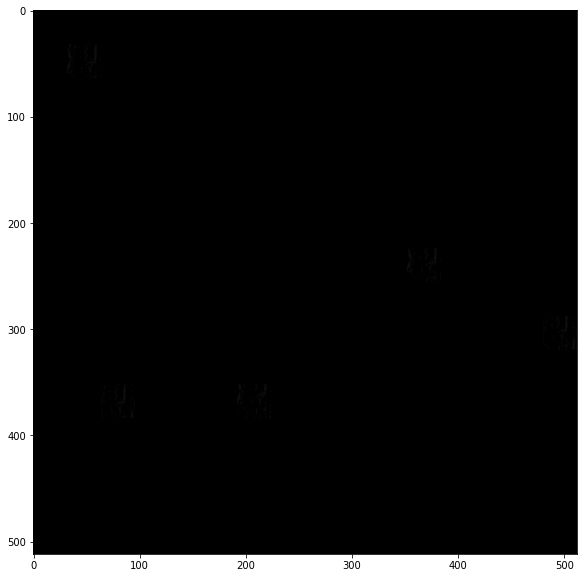

vmin: -0.1263605824746426
vmax: 0.0671992789334471


In [80]:
fig = plt.figure(figsize=(20, 10))
plt.imshow(noise_all[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.show()

print("vmin:", npmin(noise_all[0]))
print("vmax:", npmax(noise_all[0]))

#intensity_noise = []
#for i in range(noise_all.shape[0]):
#    factor = random.uniform(0, 1)
#    print(i,":",factor)
#    intensity_noise.append(noise_all[i]*factor)
#intensity_noise = np.asarray(intensity_noise)
#print(intensity_noise.shape)

#fig = plt.figure(figsize=(20, 10))
#for i in range(intensity_noise.shape[0]):
#    k = i + 1
#    plt.subplot(1,intensity_noise.shape[0],k)
#    plt.imshow(intensity_noise[i], cmap=pylab.cm.gray, vmin=0, vmax=1)
#plt.show()

(1, 512, 512)
mean: 0.1469956937630217
vmax 0.8952830188679245
vmin -0.1263605824746426


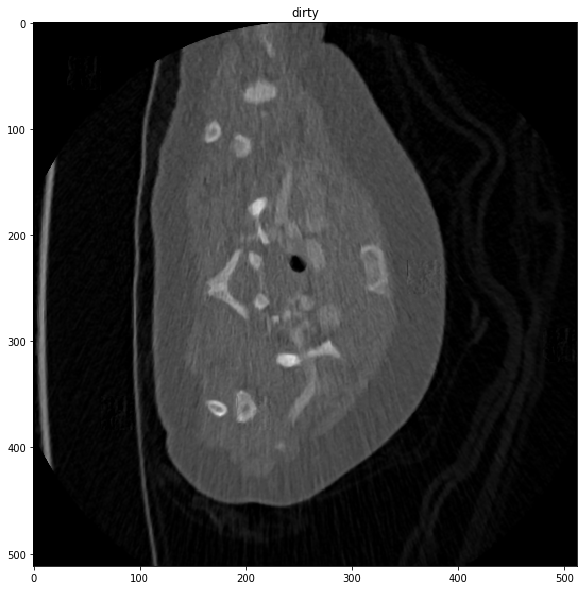

(1, 512, 512)
mean: 0.14699500581753322


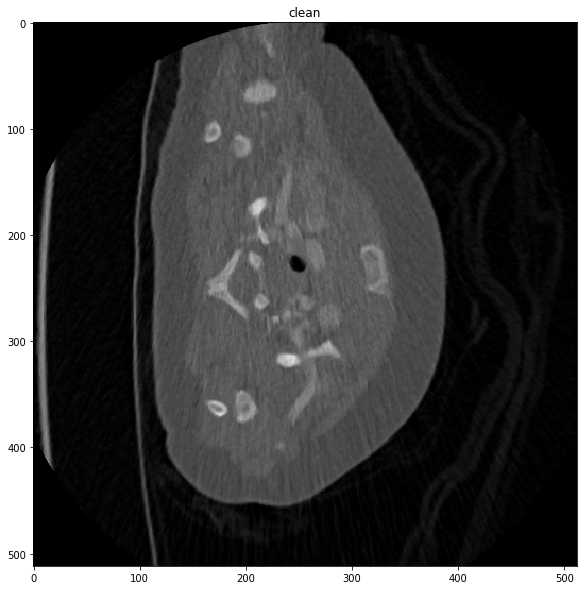

(1, 512, 512, 1)
(1, 512, 512, 1)


In [81]:
import PIL
dirty = []
clean = []
#mean = npmean(noise_all[0])
#mean = npmean(intensity_noise)
#print(mean)

#for i in range(intensity_noise.shape[0]):
#    dirty.append(label[tt] + intensity_noise[i])
for i in range(noise_all.shape[0]):
    dirty.append(label[tt] + noise_all[i])
dirty = np.asarray(dirty)
print(dirty.shape)
print("mean:", npmean(dirty))
print("vmax", npmax(dirty))
print("vmin", npmin(dirty))
fig = plt.figure(figsize=(20, 10))
plt.imshow(dirty[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("dirty")
plt.show()

#for i in range(intensity_noise.shape[0]):
for i in range(noise_all.shape[0]):
    clean.append(label[tt])
clean = np.asarray(clean)
print(clean.shape)
print("mean:", npmean(clean))
fig = plt.figure(figsize=(20, 10))
plt.imshow(clean[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("clean")
plt.show()
dirty = np.array([i for i in dirty]).reshape(-1, 512, 512, 1)
clean = np.array([i for i in clean]).reshape(-1, 512, 512, 1)

dirty = np.asarray(dirty)

print(dirty.shape)
print(clean.shape)
#dirty_valid = dirty[-4:]
#dirty_train = dirty[:-4]
#print(dirty_valid.shape)
#print(dirty_train.shape)

In [82]:
class AutoEncoder(object):
    def __init__(self, image_size, lr=0.001, cost_function='bce', optimizer='adadelta'):
      
        self.image_size = image_size
        self.lr = lr # learning rate
        self.cost_function = cost_function
        self.optimizer = optimizer
        self.build_model()
        
    def build_model(self):
        self.encoder_input = tf.placeholder(tf.float32, shape=[None, image_size, image_size, 1], name='encoder_input')
        self.decoder_output = tf.placeholder(tf.float32, shape=[None, image_size, image_size, 1], name='decoder_output')
        encoder_input = tf.reshape(self.encoder_input, [-1, image_size, image_size, 1])
        decoder_output = tf.reshape(self.decoder_output, [-1, image_size, image_size, 1])

        with tf.variable_scope('encoder', reuse=tf.AUTO_REUSE):
            hidden1 = tf.layers.conv2d(encoder_input, 32, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_1')
            hidden2 = tf.layers.conv2d(hidden1, 64, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_2')
            hidden3 = tf.layers.conv2d(hidden2, 128, 3, 2, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_3')
            hidden4 = tf.layers.conv2d(hidden3, 128, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_4')
            hidden5 = tf.layers.conv2d(hidden4, 256, 3, 2, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_5')
            hidden6 = tf.layers.conv2d(hidden5, 256, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_6')
            self.encoded_embedding = hidden6

        with tf.variable_scope('decoder'):            
            hidden7 = tf.layers.conv2d_transpose(self.encoded_embedding, 128, 4, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(),name='c_7')
            hidden8 = tf.layers.conv2d(hidden7+hidden4, 128, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_8')
            hidden9 = tf.layers.conv2d_transpose(hidden8, 64, 4, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(),name='c_9')
            hidden10 = tf.layers.conv2d(hidden9+hidden2, 32, 3, 1, padding='same', activation=tf.nn.relu, kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_10')
            outputs = tf.layers.conv2d(hidden10, 1, 3, 1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer(), name='c_11')
        
      
        if self.cost_function == 'mse':
            self.reconstruct_x = tf.reshape(outputs, [-1, image_size, image_size, 1])
            #self.reconstruct_x = outputs
            self.cost = tf.reduce_mean(tf.pow(decoder_output-outputs, 2))
        elif self.cost_function == 'bce':
            self.reconstruct_x = tf.reshape(tf.nn.sigmoid(outputs), [-1, image_size, image_size, 1])
            #self.reconstruct_x = tf.nn.sigmoid(outputs)
            self.cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                                                            labels=decoder_output, 
                                                            logits=outputs))                            
        else:
            raise NotImplementedError
            
        if self.optimizer == 'adadelta':
            self.optimize_op = tf.train.AdadeltaOptimizer(self.lr).minimize(self.cost)
        elif self.optimizer == 'adam':
            self.optimize_op = tf.train.AdamOptimizer(self.lr).minimize(self.cost)
        elif self.optimizer == 'rmsprop':
            self.optimize_op = tf.train.RMSPropOptimizer(self.lr).minimize(self.cost)
        else:
            raise NotImplementedError
            

    def train(self, sess, x_train, x_train_output, n_epoch, batch_size=1):
        t0 = time()
        train_costs_per_epoch = []
#        valid_costs_per_epoch = []
        best_cost = np.inf
        counter = 0
        def iter_data(*data, **kwargs):
            size = kwargs.get('batch_size', 1)
            try:
                n = len(data[0])
            except:
                n = data[0].shape[0]
            batches = int(n / size)
            if n % size != 0:
                batches += 1

            for b in range(batches):
                start = b * size
                end = (b + 1) * size
                if end > n:
                    end = n
                if len(data) == 1:
                    yield data[0][start:end]
                else:
                    yield tuple([d[start:end] for d in data])
        for epoch in range(n_epoch):
            t = time()
            shuffle_idx = np.random.permutation(len(x_train))
            x_train = x_train[shuffle_idx]
            x_train_output = x_train_output[shuffle_idx]
            train_costs = []
#            valid_costs = []

            # train
            for input_batch, output_batch in iter_data(x_train, x_train_output, batch_size=batch_size):
                feed_dict = {
                    self.encoder_input: input_batch, 
                    self.decoder_output: output_batch
                }
                _, cost = sess.run([self.optimize_op, self.cost], feed_dict=feed_dict)
                train_costs.append(cost)
            train_costs_per_epoch.append(np.mean(train_costs))
        return train_costs_per_epoch
            
    def encode(self, sess, inputs):
        return sess.run(self.encoded_embedding, feed_dict={self.encoder_input: inputs})
      
    def reconstruct(self, sess, inputs):
        return sess.run(self.reconstruct_x, feed_dict={self.encoder_input: inputs})



In [83]:
image_size = 512
n_epoch = 1000
tf.reset_default_graph()
np.random.seed(123)
tf.set_random_seed(123)
autoencoder = AutoEncoder(image_size, optimizer='adam', lr=0.0001)

#iter1
#start1 = datetime.datetime.now()
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())
start1 = datetime.datetime.now()
train_costs_per_epoch = autoencoder.train(sess, dirty, clean, n_epoch)
end1 = datetime.datetime.now()
print(train_costs_per_epoch)
print((end1 - start1), "seconds")

[0.69089836, 0.6893749, 0.68794835, 0.6864296, 0.6847001, 0.6826652, 0.6801146, 0.67689204, 0.6728343, 0.66777945, 0.6614952, 0.653758, 0.64458156, 0.6345167, 0.625381, 0.62086016, 0.62199974, 0.6203085, 0.61295205, 0.60355777, 0.5952161, 0.5885787, 0.582544, 0.57561374, 0.5667673, 0.5556113, 0.5423406, 0.52751756, 0.51140165, 0.49378055, 0.47439888, 0.45312178, 0.43034133, 0.4074979, 0.3856374, 0.3660124, 0.35008577, 0.3386778, 0.3317296, 0.32819825, 0.3265249, 0.32533616, 0.3240707, 0.32298207, 0.32252234, 0.32276672, 0.3232362, 0.32332814, 0.32289737, 0.32230777, 0.3219695, 0.3218869, 0.32172343, 0.32123208, 0.32049334, 0.3197885, 0.31931114, 0.31901202, 0.31871933, 0.31839883, 0.31820774, 0.31825057, 0.3183641, 0.31829205, 0.31803858, 0.31778067, 0.3175969, 0.31740987, 0.31716323, 0.31693435, 0.3168122, 0.31674254, 0.31661633, 0.31642306, 0.3162336, 0.3160782, 0.31592104, 0.3157642, 0.3156286, 0.31549546, 0.3153236, 0.31513268, 0.31496936, 0.31480554, 0.31460202, 0.31440008, 0.3142

In [84]:
recon = autoencoder.reconstruct(sess, clean)
out = (clean+recon)/2
noisy = (clean-out)-npmean(clean-out)
print("min:", npmin(noisy))
print("max:", npmax(noisy))

dirty2 = out + noisy
clean2 = out

#iter2
start2 = datetime.datetime.now()
train_costs_per_epoch2 = autoencoder.train(sess, dirty2, clean2, n_epoch)
end2 = datetime.datetime.now()
print(train_costs_per_epoch2)
print((end2 - start2), "seconds")

min: -0.09571476122063846
max: 0.09702088453539323
[0.305839, 0.3058464, 0.30586308, 0.3058685, 0.30585736, 0.3058422, 0.3058374, 0.3058445, 0.3058523, 0.30585107, 0.30584264, 0.30583632, 0.30583757, 0.3058427, 0.30584472, 0.30584133, 0.30583644, 0.3058349, 0.305837, 0.30583948, 0.30583936, 0.30583683, 0.30583435, 0.3058339, 0.30583516, 0.30583635, 0.3058362, 0.30583483, 0.30583334, 0.30583283, 0.30583328, 0.30583394, 0.30583405, 0.30583346, 0.3058326, 0.30583197, 0.3058319, 0.30583215, 0.30583236, 0.30583227, 0.3058319, 0.3058314, 0.30583102, 0.30583087, 0.3058309, 0.30583096, 0.30583093, 0.30583075, 0.30583048, 0.3058302, 0.30582997, 0.30582982, 0.30582976, 0.3058297, 0.30582964, 0.30582952, 0.3058294, 0.30582923, 0.30582905, 0.30582887, 0.30582872, 0.30582857, 0.3058285, 0.3058284, 0.3058283, 0.3058282, 0.3058281, 0.30582798, 0.3058279, 0.3058278, 0.3058277, 0.30582762, 0.3058275, 0.30582744, 0.30582738, 0.30582744, 0.3058275, 0.30582768, 0.30582803, 0.30582863, 0.3058296, 0.3058311

In [85]:
iter2_out = autoencoder.reconstruct(sess, clean2)
out2 = (clean2+iter2_out)/2
noisy2 = (clean2-out2)-npmean(clean2-out2)
print("min:", npmin(noisy2))
print("max:", npmax(noisy2))

dirty3 = out2 + noisy2
clean3 = out2

#iter3
start3 = datetime.datetime.now()
train_costs_per_epoch3 = autoencoder.train(sess, dirty3, clean3, n_epoch)
end3 = datetime.datetime.now()
print(train_costs_per_epoch3)
print((end3 - start3), "seconds")

min: -0.02347890039344296
max: 0.059391781640284816
[0.3074985, 0.3074382, 0.30746523, 0.30744243, 0.30745715, 0.30742317, 0.30739245, 0.3074125, 0.30740857, 0.3074295, 0.3073971, 0.3073634, 0.30739063, 0.30738777, 0.30738518, 0.30738544, 0.3073745, 0.30738005, 0.3073669, 0.3073613, 0.30737507, 0.3073719, 0.3073698, 0.30736583, 0.30736136, 0.3073656, 0.30736017, 0.30735898, 0.3073638, 0.30736148, 0.30736077, 0.30735832, 0.3073575, 0.30735976, 0.30735716, 0.30735704, 0.30735832, 0.30735722, 0.30735728, 0.30735576, 0.3073557, 0.3073568, 0.30735567, 0.30735558, 0.30735555, 0.3073553, 0.30735552, 0.30735466, 0.3073547, 0.30735502, 0.3073547, 0.3073547, 0.3073544, 0.3073544, 0.3073545, 0.30735415, 0.3073541, 0.30735406, 0.30735406, 0.30735412, 0.30735385, 0.30735382, 0.30735385, 0.30735373, 0.30735373, 0.3073536, 0.30735362, 0.30735362, 0.30735353, 0.3073535, 0.3073534, 0.30735338, 0.3073534, 0.30735332, 0.3073533, 0.30735326, 0.30735323, 0.3073532, 0.30735314, 0.30735314, 0.30735314, 0.307

In [86]:
iter3_out = autoencoder.reconstruct(sess, clean3)
out3 = (clean3+iter3_out)/2
noisy3 = (clean3-out3)-npmean(clean3-out3)
print("min:", npmin(noisy3))
print("max:", npmax(noisy3))

dirty4 = out3 + noisy3
clean4 = out3

#iter4
start4 = datetime.datetime.now()
train_costs_per_epoch4 = autoencoder.train(sess, dirty4, clean4, n_epoch)
end4 = datetime.datetime.now()
print(train_costs_per_epoch4)
print((end4 - start4), "seconds")

min: -0.012366561992551423
max: 0.051176358944214496
[0.30675995, 0.30675322, 0.30675542, 0.30675587, 0.3067611, 0.30675757, 0.30675435, 0.30675018, 0.30674797, 0.30675018, 0.3067494, 0.30675068, 0.30674937, 0.30675018, 0.3067505, 0.3067498, 0.30674946, 0.3067474, 0.3067472, 0.30674654, 0.30674702, 0.3067472, 0.30674702, 0.30674732, 0.3067472, 0.30674765, 0.3067474, 0.30674726, 0.30674693, 0.3067466, 0.30674654, 0.30674624, 0.30674616, 0.3067459, 0.3067458, 0.3067458, 0.30674586, 0.30674592, 0.30674586, 0.3067459, 0.3067459, 0.306746, 0.30674607, 0.30674604, 0.306746, 0.306746, 0.306746, 0.30674607, 0.30674607, 0.3067461, 0.30674613, 0.30674618, 0.3067463, 0.30674642, 0.3067466, 0.30674678, 0.30674708, 0.30674744, 0.306748, 0.3067487, 0.30674967, 0.306751, 0.3067529, 0.3067554, 0.30675888, 0.30676347, 0.3067698, 0.3067776, 0.30678785, 0.30679893, 0.30681154, 0.30682063, 0.3068261, 0.30682057, 0.30680656, 0.3067841, 0.30676246, 0.30674857, 0.30674642, 0.30675378, 0.30676466, 0.30677333,

0:03:51.010946 seconds


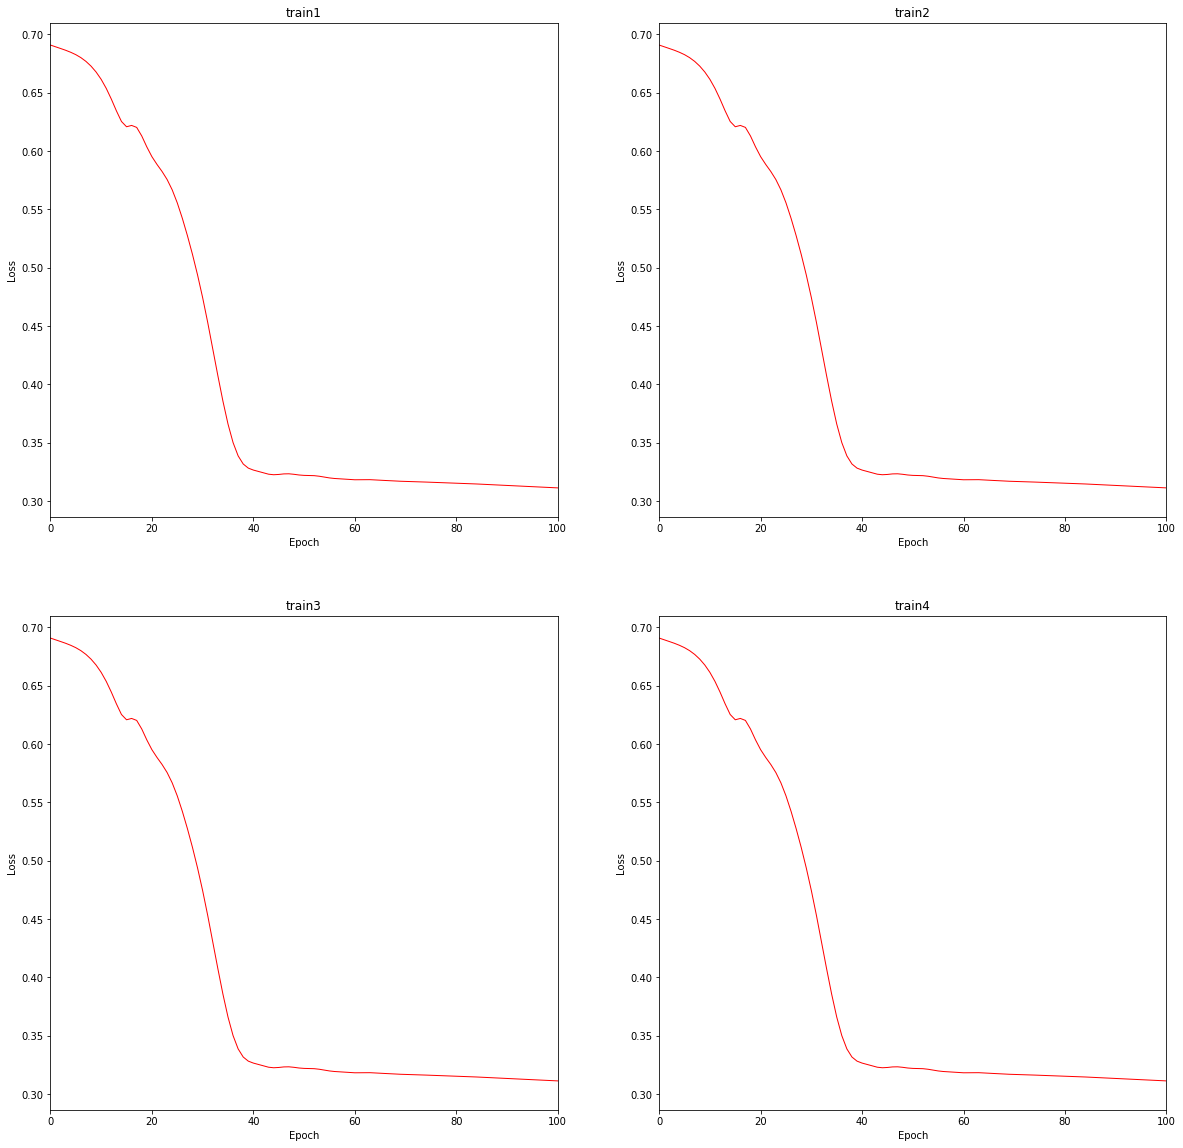

In [87]:
traintime = (end1-start1)+(end2-start2)+(end3-start3)+(end4-start4)
print(traintime, "seconds")
fig = plt.figure(figsize=(20, 20))
plt.subplot(221)
x = [i for i in range(n_epoch)]
y = [j for j in train_costs_per_epoch]
plt.xlim((0, 100))
plt.title("train1")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x,y,color="red",label="loss",linewidth=1)

plt.subplot(222)
x2 = [i for i in range(n_epoch)]
y2 = [j for j in train_costs_per_epoch2]
plt.xlim((0, 100))
plt.title("train2")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x,y,color="red",label="loss",linewidth=1)

plt.subplot(223)
x3 = [i for i in range(n_epoch)]
y3 = [j for j in train_costs_per_epoch3]
plt.xlim((0, 100))
plt.title("train3")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x,y,color="red",label="loss",linewidth=1)

plt.subplot(224)
x4 = [i for i in range(n_epoch)]
y4 = [j for j in train_costs_per_epoch4]
plt.xlim((0, 100))
plt.title("train4")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x,y,color="red",label="loss",linewidth=1)
plt.show()

test-time 0:00:00.038360 seconds


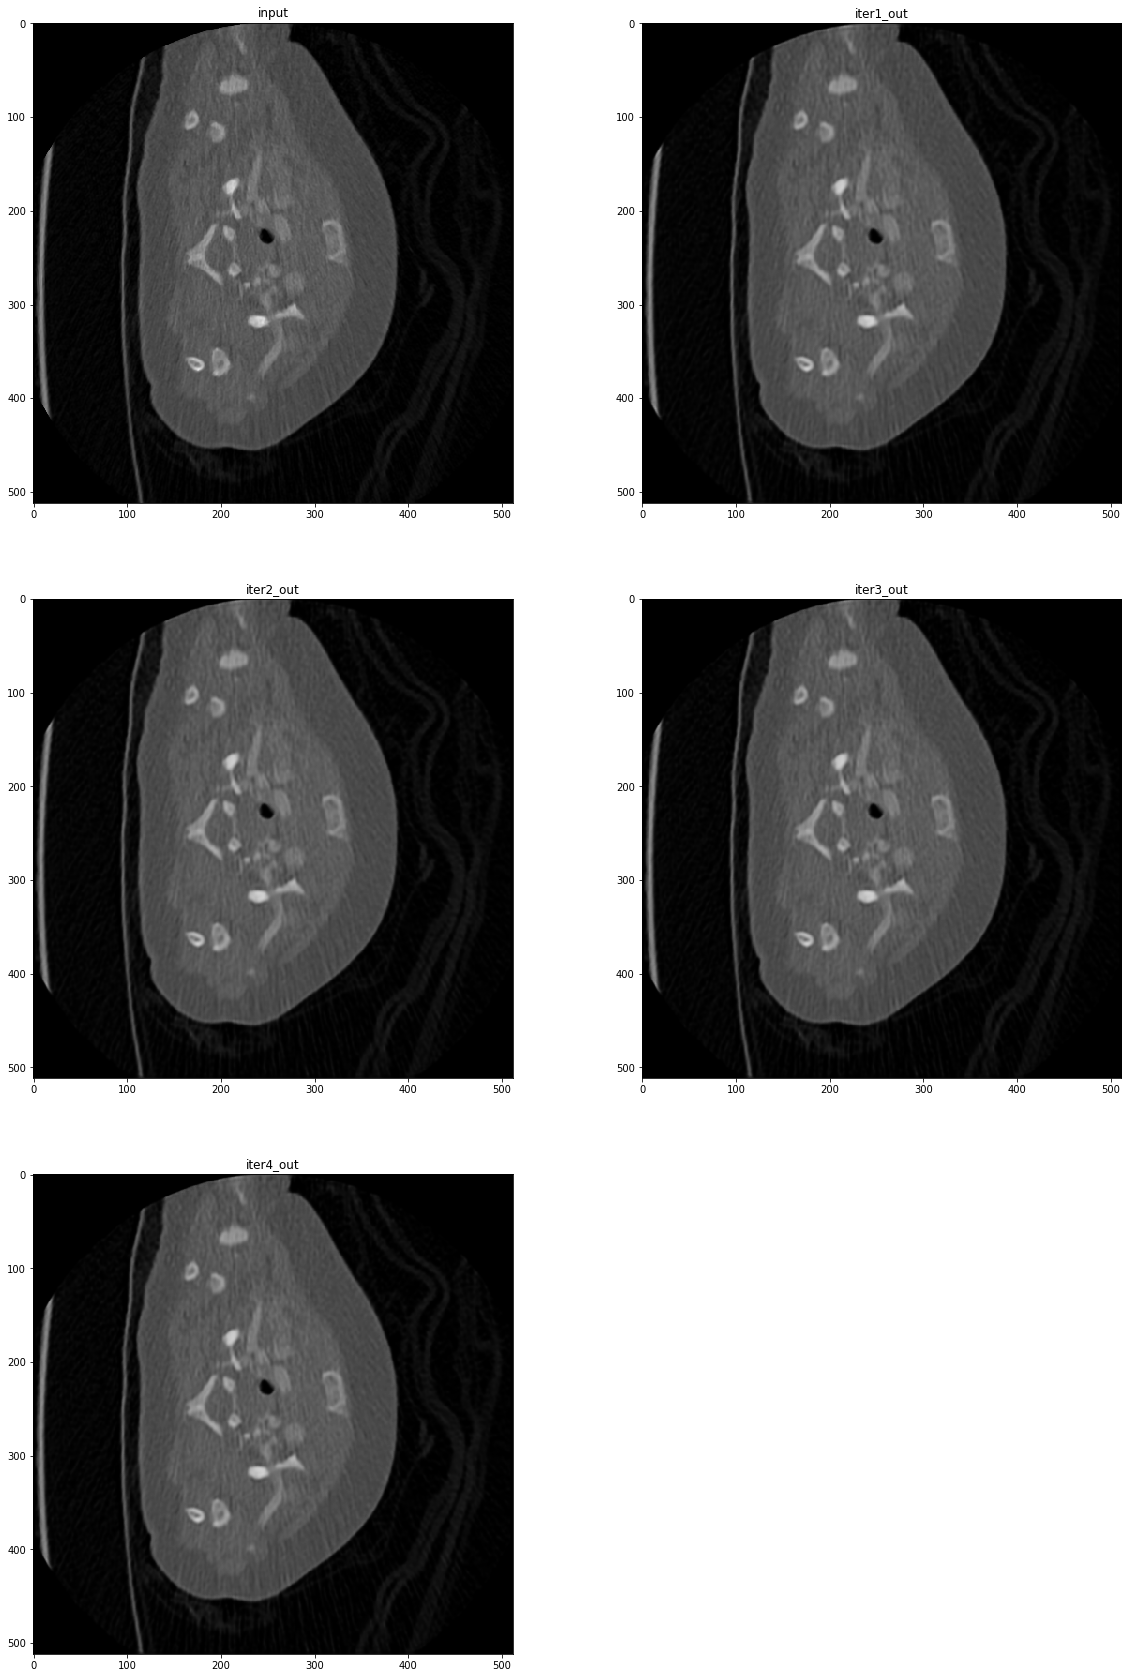

In [88]:
start5 = datetime.datetime.now()
iter4_out = autoencoder.reconstruct(sess, clean4)
end5 = datetime.datetime.now()
print("test-time", (end5 - start5), "seconds")

orig_imgs = []
for img in clean:
    tmp = img.reshape([512, 512])
    tmp = cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_CUBIC)
    orig_imgs.append(tmp)
orig_imgs = np.asarray(orig_imgs)

recon_imgs = []
for img in recon:
    tmp = img.reshape([512, 512])
    tmp = cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_CUBIC)
    recon_imgs.append(tmp)
recon_imgs = np.asarray(recon_imgs)

iter2_out_imgs = []
for img in iter2_out:
    tmp = img.reshape([512, 512])
    tmp = cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_CUBIC)
    iter2_out_imgs.append(tmp)
iter2_out_imgs = np.asarray(iter2_out_imgs)

iter3_out_imgs = []
for img in iter3_out:
    tmp = img.reshape([512, 512])
    tmp = cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_CUBIC)
    iter3_out_imgs.append(tmp)
iter3_out_imgs = np.asarray(iter3_out_imgs)

iter4_out_imgs = []
for img in iter4_out:
    tmp = img.reshape([512, 512])
    tmp = cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_CUBIC)
    iter4_out_imgs.append(tmp)
iter4_out_imgs = np.asarray(iter4_out_imgs)

fig = plt.figure(figsize=(20, 30))
plt.subplot(3,2,1)
plt.imshow(orig_imgs[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("input")

plt.subplot(3,2,2)
plt.imshow(recon_imgs[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("iter1_out")

plt.subplot(3,2,3)
plt.imshow(iter2_out_imgs[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("iter2_out")

plt.subplot(3,2,4)
plt.imshow(iter3_out_imgs[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("iter3_out")

plt.subplot(3,2,5)
plt.imshow(iter4_out_imgs[0], cmap=pylab.cm.gray, vmin=0, vmax=1)
plt.title("iter4_out")
plt.show()


In [89]:
def renorm(data, origin):
    return (data*(npmax(origin)-npmin(origin))+npmin(origin))

iter1 = renorm(recon_imgs[0], img_array)
iter2 = renorm(iter2_out_imgs[0], img_array)
iter3 = renorm(iter3_out_imgs[0], img_array)
output = renorm(iter4_out_imgs[0], img_array)
print(npmin(output), npmax(output))

origin_r = img_array[tt, ROI_y[0]: ROI_y[0]+ROI_s, ROI_x[0]: ROI_x[0]+ROI_s]
origin_b = img_array[tt, ROI_y[1]: ROI_y[1]+ROI_s, ROI_x[1]: ROI_x[1]+ROI_s]
output_r = output[ROI_y[0]: ROI_y[0]+ROI_s, ROI_x[0]: ROI_x[0]+ROI_s]
output_b = output[ROI_y[1]: ROI_y[1]+ROI_s, ROI_x[1]: ROI_x[1]+ROI_s]
iter1_r = iter1[ROI_y[0]: ROI_y[0]+ROI_s, ROI_x[0]: ROI_x[0]+ROI_s]
iter1_b = iter1[ROI_y[1]: ROI_y[1]+ROI_s, ROI_x[1]: ROI_x[1]+ROI_s]
iter2_r = iter2[ROI_y[0]: ROI_y[0]+ROI_s, ROI_x[0]: ROI_x[0]+ROI_s]
iter2_b = iter2[ROI_y[1]: ROI_y[1]+ROI_s, ROI_x[1]: ROI_x[1]+ROI_s]
iter3_r = iter3[ROI_y[0]: ROI_y[0]+ROI_s, ROI_x[0]: ROI_x[0]+ROI_s]
iter3_b = iter3[ROI_y[1]: ROI_y[1]+ROI_s, ROI_x[1]: ROI_x[1]+ROI_s]

print("origin_r:","mean=", npmean(origin_r), "SD=", np.std(origin_r), "origin_b:","mean=", npmean(origin_b), "SD=", np.std(origin_b))
print("iter1_r:","mean=", npmean(iter1_r), "SD=", np.std(iter1_r), "iter1_b:","mean=", npmean(iter1_b), "SD=", np.std(iter1_b))
print("iter2_r:","mean=", npmean(iter2_r), "SD=", np.std(iter2_r), "iter1_b:","mean=", npmean(iter2_b), "SD=", np.std(iter2_b))
print("iter3_r:","mean=", npmean(iter3_r), "SD=", np.std(iter3_r), "iter1_b:","mean=", npmean(iter3_b), "SD=", np.std(iter3_b))
print("output_r:","mean=", npmean(output_r), "SD=", np.std(output_r), "output_b:","mean=", npmean(output_b), "SD=", np.std(output_b))

-1024.0 1571.0916
origin_r: mean= 54.09777777777778 SD= 79.52229174231975 origin_b: mean= 104.49777777777778 SD= 66.01899554552088
iter1_r: mean= 55.575737 SD= 70.64733 iter1_b: mean= 107.705574 SD= 51.097633
iter2_r: mean= 69.2386 SD= 69.4932 iter1_b: mean= 119.808395 SD= 51.37516
iter3_r: mean= 65.36748 SD= 69.3563 iter1_b: mean= 115.641716 SD= 51.396877
output_r: mean= 65.04211 SD= 69.17261 output_b: mean= 115.51177 SD= 51.33246


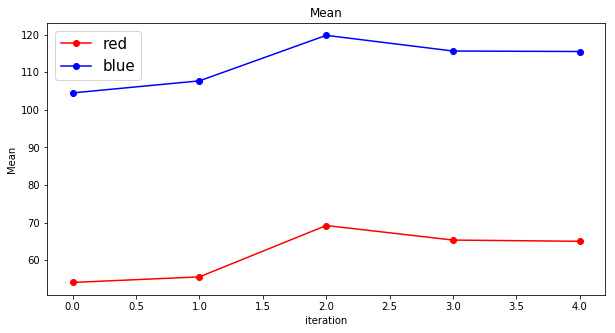

In [90]:

iteration = [0, 1, 2, 3, 4]
mean_r = [npmean(origin_r), npmean(iter1_r), npmean(iter2_r), npmean(iter3_r), npmean(output_r)]
mean_b = [npmean(origin_b), npmean(iter1_b), npmean(iter2_b), npmean(iter3_b), npmean(output_b)]
plt.figure(figsize=(10,5),linewidth = 1)
plt.plot(iteration, mean_r, '-o', color='r', label="red")
plt.plot(iteration, mean_b, '-o', color='b', label="blue")
plt.title("Mean")
plt.xlabel("iteration")
plt.ylabel("Mean")
plt.legend(loc = "best", fontsize=15)
plt.show()

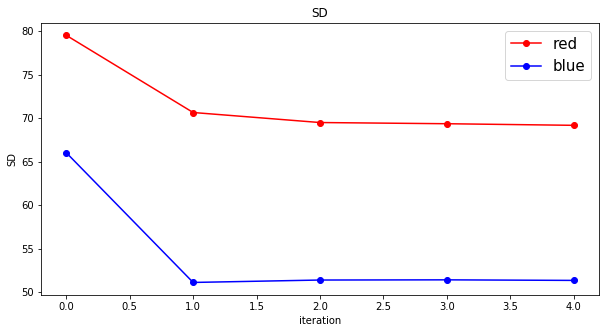

In [91]:
sd_r = [np.std(origin_r), np.std(iter1_r), np.std(iter2_r), np.std(iter3_r), np.std(output_r)]
sd_b = [np.std(origin_b), np.std(iter1_b), np.std(iter2_b), np.std(iter3_b), np.std(output_b)]
plt.figure(figsize=(10,5),linewidth = 1)
plt.plot(iteration, sd_r, '-o', color='r', label="red")
plt.plot(iteration, sd_b, '-o', color='b', label="blue")
plt.title("SD")
plt.xlabel("iteration")
plt.ylabel("SD")
plt.legend(loc = "best", fontsize=15)
plt.show()

In [92]:
sess.close()